<h1> Pyber Homework </h1>

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

city_filepath=os.path.join('data','city_data.csv')
ride_filepath=os.path.join('data','ride_data.csv')

# Read the City and Ride Data
city_df=pd.read_csv(city_filepath)
ride_df=pd.read_csv(ride_filepath)
# Combine the data into a single dataset
all_df=pd.merge(ride_df,city_df,how='left',on=['city','city'])
# Display the data table for preview
all_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

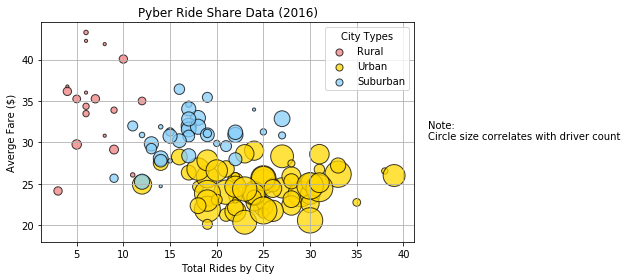

In [8]:
# Obtain the x and y coordinates for each of the three city types
#Find appropriate data and create lists
grouped_cities=all_df.groupby(['city'])
city_types=grouped_cities['type'].first()
city_rides=grouped_cities['ride_id'].count()
city_drivers=grouped_cities['driver_count'].first()
city_avgfare=grouped_cities['fare'].mean()
city_data=pd.DataFrame({'Type':city_types,
                       'Total Rides':city_rides,
                        'Total Drivers': city_drivers,
                        'Average Fare': city_avgfare})
rural_rides=[]
rural_drivers=[]
rural_fare=[]
suburban_rides=[]
suburban_drivers=[]
suburban_fare=[]
urban_rides=[]
urban_drivers=[]
urban_fare=[]

for index,row in city_data.iterrows():
    if row['Type']=='Rural':
        rural_rides.append(row['Total Rides'])
        rural_drivers.append(row['Total Drivers']*10)
        rural_fare.append(row['Average Fare'])
    elif row['Type']=='Urban':
        urban_rides.append(row['Total Rides'])
        urban_drivers.append(row['Total Drivers']*10)
        urban_fare.append(row['Average Fare'])
    elif row['Type']=='Suburban':
        suburban_rides.append(row['Total Rides'])
        suburban_drivers.append(row['Total Drivers']*10)
        suburban_fare.append(row['Average Fare'])
        

#create graph
rural_data=plt.scatter(rural_rides,rural_fare,marker='o', facecolors='lightcoral',edgecolor='black',
                       s=rural_drivers,alpha=.75,label='Rural')
urban_data=plt.scatter(urban_rides, urban_fare, marker='o',facecolors='gold',edgecolor='black',
                       s=urban_drivers,alpha=.75, label='Urban')
suburban_data=plt.scatter(suburban_rides, suburban_fare, marker='o',edgecolor='black',facecolors='lightskyblue',
                          s=suburban_drivers, alpha=.75,label='Suburban')
# Incorporate the other graph properties
plt.grid()
plt.xlabel('Total Rides by City')
plt.ylabel('Averge Fare ($)')
plt.title('Pyber Ride Share Data (2016)')


# Create a legend
lgnd=plt.legend(title='City Types')
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]
plt.tight_layout()
# Incorporate a text label regarding circle size
textstr='Note: \nCircle size correlates with driver count '
plt.figtext(1,.5, textstr, fontsize=10)


# Save Figure

data_filepath=os.path.join('images','ridesharedata.jpg')
plt.savefig(data_filepath)
plt.show()

## Total Fares by City Type

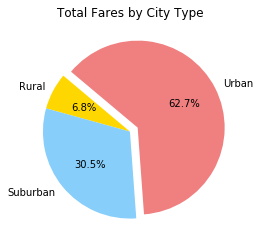

In [139]:
# Calculate Type Percents
group_types=all_df.groupby(['type']).sum()['fare']

explode=[0,0,.1]
colors=['gold','lightskyblue','lightcoral']
group_types.plot(kind='pie',autopct='%1.1f%%',colors=colors,startangle=140,explode=explode)
plt.title('Total Fares by City Type')
plt.ylabel(' ')


# Save Figure
faresdata_filepath=os.path.join('images','faresbycity.jpg')
plt.savefig(faresdata_filepath)
plt.show()

## Total Rides by City Type

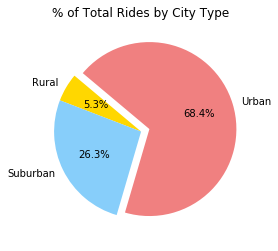

In [145]:
# Calculate Ride Percents
group_rides=all_df.groupby(['type']).count()['ride_id']

# Build Pie Chart
explode=[0,0,.1]
colors=['gold','lightskyblue','lightcoral']
group_rides.plot(kind='pie',autopct='%1.1f%%',colors=colors,startangle=140,explode=explode)
plt.title('% of Total Rides by City Type')
plt.ylabel(' ')
# Save Figure
ridedata_filepath=os.path.join('images','ridesbycity.jpg')
plt.savefig(ridedata_filepath)
plt.show()

## Total Drivers by City Type

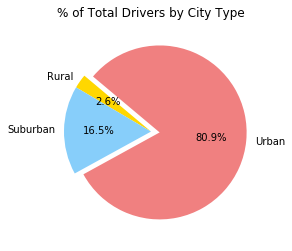

In [153]:
# Calculate Driver Percents
group_drivers=city_data.groupby(['Type']).sum()['Total Drivers']
# Build Pie Charts
explode=[0,0,.1]
colors=['gold','lightskyblue','lightcoral']
group_drivers.plot(kind='pie',autopct='%1.1f%%',colors=colors,startangle=140,explode=explode)
plt.title('% of Total Drivers by City Type')
plt.ylabel(' ')
# Save Figure
driverdata_filepath=os.path.join('images','driversbycity.jpg')
plt.savefig(driverdata_filepath)
plt.show()